In [10]:
from data.src.dataLoaders import GrooveDataSet_Density, GrooveDataSet_Control
import matplotlib
import torch
import numpy as np
import os

os.chdir("/Users/jlenz/Desktop/Thesis/GrooveTransformer")

In [11]:
training_dataset = GrooveDataSet_Density(
        dataset_setting_json_path="data/dataset_json_settings/4_4_BeatsAndFills_gmd.json",
        subset_tag="train",
        max_len=32,
        load_as_tensor=False,
        down_sampled_ratio=None,
        move_all_to_gpu=False,
        hit_loss_balancing_beta=0,
        genre_loss_balancing_beta=0)

densities = training_dataset.get_densities()

print(np.amax(densities))
print(np.amin(densities))

INFO:data.Base.dataLoaders:Loading gmd dataset
INFO:data.Base.dataLoaders:Loading Cached Version from: data/gmd/resources/cached/beat_division_factor_[4]/drum_mapping_label_ROLAND_REDUCED_MAPPING/time_signature_['4-4']


subset length: 16496


100%|██████████| 16496/16496 [00:06<00:00, 2551.35it/s]
INFO:data.Base.dataLoaders:Loaded 16496 sequences


1.0
0.0


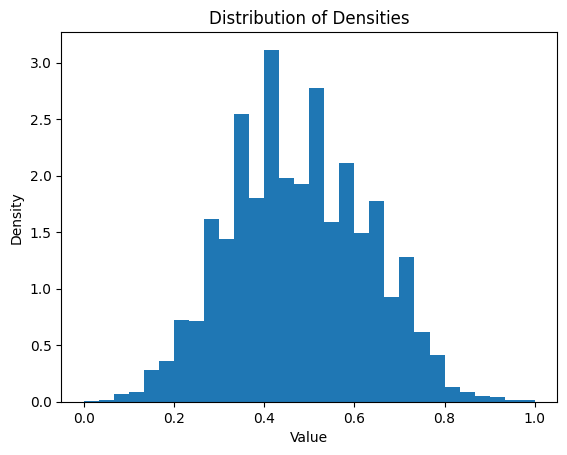

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [15]:
# Plotting the histogram
import matplotlib.pyplot as plt
plt.clf()
plt.hist(densities, bins=30, density=True)  # 'bins' determines the number of bins in the histogram
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Densities')
plt.show()

In [17]:
ctrl_dataset = GrooveDataSet_Control(
        dataset_setting_json_path="data/dataset_json_settings/4_4_BeatsAndFills_gmd.json",
        subset_tag="train",
        max_len=32,
        tapped_voice_idx=2,
        collapse_tapped_sequence=True,
        load_as_tensor=False,
        down_sampled_ratio=None,
        move_all_to_gpu=False,
        hit_loss_balancing_beta=0,
        genre_loss_balancing_beta=0,
        normalize_densities=True,
        normalize_intensities=True,
        custom_genre_mapping_dict=None
    )


INFO:data.Base.dataLoaders:Loading gmd dataset
INFO:data.Base.dataLoaders:Loading Cached Version from: data/gmd/resources/cached/beat_division_factor_[4]/drum_mapping_label_ROLAND_REDUCED_MAPPING/time_signature_['4-4']


subset len: 16496
removing value 4565 with intensity 0.047244094488188976
subset len: 16495
subset length: 16495


100%|██████████| 16495/16495 [00:07<00:00, 2330.91it/s]
/Users/jlenz/Desktop/Thesis/GrooveTransformer/data/control/control_utils.py:61: RuntimeWarning: divide by zero encountered in divide
  weights = total_count / genre_counts  # Calculate weights
INFO:data.Base.dataLoaders:Loaded 16495 sequences


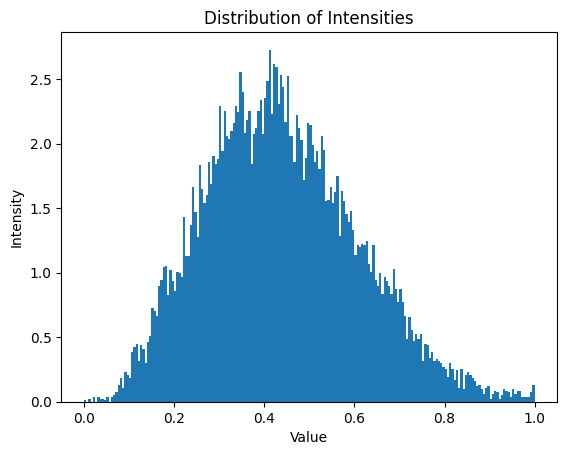

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [18]:
densities = ctrl_dataset.get_densities()
intensities = ctrl_dataset.get_intensities()

plt.clf()
plt.hist(intensities, bins=200, density=True)  # 'bins' determines the number of bins in the histogram
plt.xlabel('Value')
plt.ylabel('Intensity')
plt.title('Distribution of Intensities')
plt.show()

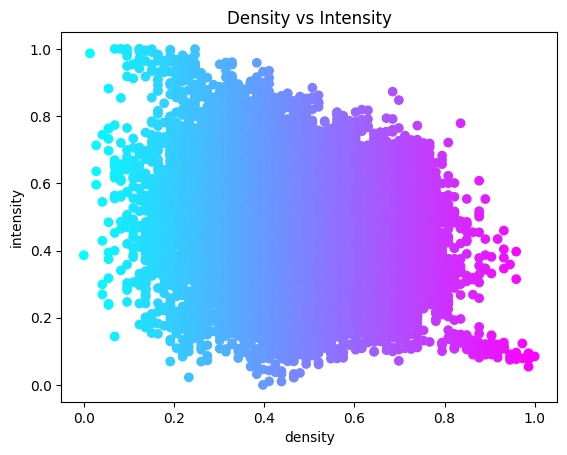

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [19]:


plt.clf()
plt.scatter(densities, intensities, c=densities, cmap='cool')

# Label the axes and the chart:
plt.xlabel('density')
plt.ylabel('intensity')
plt.title('Density vs Intensity')

# Show the plot:
plt.show()
